In [ ]:
pip install ta

In [41]:
## importing libraries
import numpy as np
import pandas as pd
import ta as ta
import statsmodels.api as sm
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [15]:
tsla_raw_df = pd.read_csv(r"C:\Users\jaabboud\Desktop\TSLA.csv")
tsla_raw_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [16]:
tsla_raw_df["Diff"] = tsla_raw_df["Open"]-tsla_raw_df["Close"]
tsla_raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-4.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1.960001
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,3.040001
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3.799999
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,3.889999


In [62]:
## Bollinger Bands
indicator_bb = ta.volatility.BollingerBands(close=tsla_raw_df["Close"], n=20, ndev=2)
print(type(indicator_bb))

<class 'ta.volatility.BollingerBands'>


In [63]:
tsla_raw_df['bb_bbm'],tsla_raw_df['bb_bbh'], tsla_raw_df['bb_bbl'] = indicator_bb.bollinger_mavg(), indicator_bb.bollinger_hband(),indicator_bb.bollinger_lband()
tsla_raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_upper_dist,bb_avg_dist
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-4.889999,23.889999,23.889999,23.889999,0.0,0.0,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1.960001,23.860000,23.919999,23.800000,0.0,0.0,75.000000,12.500000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,3.040001,23.226666,25.018673,21.434659,0.0,0.0,85.342125,17.671063
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3.799999,22.220000,26.036935,18.403065,0.0,0.0,89.560523,19.780262
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,3.889999,20.998000,26.960191,15.035809,0.0,0.0,90.991631,20.495815


In [19]:
## Add Bollinger bands high and low
tsla_raw_df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
tsla_raw_df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()
tsla_raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-4.889999,23.889999,23.889999,23.889999,0.0,0.0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1.960001,23.860000,23.919999,23.800000,0.0,0.0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,3.040001,23.226666,25.018673,21.434659,0.0,0.0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3.799999,22.220000,26.036935,18.403065,0.0,0.0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,3.889999,20.998000,26.960191,15.035809,0.0,0.0


In [31]:
tsla_raw_df["bb_bbhi"].unique()
tsla_raw_df["bb_bbli"].unique()

array([0., 1.])

In [21]:
#tsla_raw_df.loc[tsla_raw_df["bb_bbhi"] == 1,"bb_bbhi_test"] = "+"
#tsla_raw_df.loc[tsla_raw_df["bb_bbhi"] != 1,"bb_bbhi_test"] = "-"
#tsla_raw_df.head()

In [22]:
#tsla_raw_df.loc[tsla_raw_df["bb_bbli"] == 1,"bb_bbli_test"] = "+"
#tsla_raw_df.loc[tsla_raw_df["bb_bbli"] != 1,"bb_bbli_test"] = "-"
#tsla_raw_df.head()

In [33]:
tsla_raw_df["bb_upper_dist"] = ((tsla_raw_df["bb_bbh"] -tsla_raw_df["Close"]) / (tsla_raw_df["bb_bbh"] - tsla_raw_df["bb_bbl"])) * 100
tsla_raw_df["bb_avg_dist"] = ((tsla_raw_df["bb_bbm"] -tsla_raw_df["Close"]) / ((tsla_raw_df["bb_bbh"] - tsla_raw_df["bb_bbl"]))/2) * 100
tsla_raw_df.head(5)
#tsla_df = tsla_df[~tsla_df.isin([np.nan, np.inf, -np.inf]).any(1)]
#tsla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_upper_dist,bb_avg_dist
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-4.889999,23.889999,23.889999,23.889999,0.0,0.0,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1.960001,23.860000,23.919999,23.800000,0.0,0.0,75.000000,12.500000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,3.040001,23.226666,25.018673,21.434659,0.0,0.0,85.342125,17.671063
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3.799999,22.220000,26.036935,18.403065,0.0,0.0,89.560523,19.780262
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,3.889999,20.998000,26.960191,15.035809,0.0,0.0,90.991631,20.495815


In [43]:
# define variables for regression
y = tsla_df["Close"]
x = tsla_df[["Open","bb_upper_dist"]]
type(x)

pandas.core.frame.DataFrame

In [46]:
# Regression
tsla_df = tsla_raw_df.dropna()
model = sm.OLS(y, x).fit()
pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.714e+06
Date:                Mon, 02 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:53:59   Log-Likelihood:                         -7847.2
No. Observations:                2430   AIC:                                  1.570e+04
Df Residuals:                    2428   BIC:                                  1.571e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Open              1.0055      0.001   1423.745      0.000       1.004       1.007
bb_upper_dist    -0.0307      0.003    -10.566      0.000      -0.036      -0.025
==============================================================================
Omnibus:                     1045.602   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389865.732
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                      65.036   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

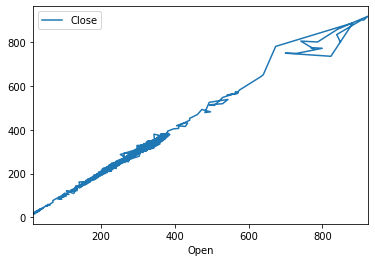

In [47]:
tsla_df.plot(x="Open", y="Close",)

In [86]:
tsla_df["Median"] = tsla_df["High"]-tsla_df["Low"]
tsla_df["Median"]

C:\Users\jaabboud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1         7.120001
2         5.650000
3         4.390001
4         4.170000
5         1.649999
6         1.950000
7         1.350001
8         1.070000
9         1.739999
10        2.390000
11        2.500000
12        1.250000
13        1.330000
14        1.800001
15        1.400000
16        0.879999
17        0.500000
18        1.200001
19        0.920000
20        0.390000
21        0.879999
22        0.890002
23        0.639999
24        1.130001
25        1.330000
26        1.500000
27        0.640000
28        0.529999
29        0.830000
30        1.029999
           ...    
2401     33.630005
2402     22.509949
2403     21.050049
2404     22.290009
2405     12.509979
2406     20.170044
2407     35.400024
2408     26.400024
2409     19.599975
2410     25.159973
2411     18.729981
2412     22.369995
2413     32.880005
2414     20.479980
2415    112.619995
2416    135.109985
2417    141.869995
2418    108.830017
2419     39.750000
2420     67.589966
2421     25.510010
2422     26.

In [78]:
EMA = ta.EMA(Median)

AttributeError: module 'ta' has no attribute 'EMA'